<a href="https://colab.research.google.com/github/NevermindGust/IA_Python_Aulas/blob/main/A3_MarvelMovie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise de um dataset contendo dados de filmes da Marvel, nossa intenção inicial é relacionar o lucro do filmes com a data em que foram lançados, visto que os filmes mais lucrativos da história estrearam em dois periodos especificos: em meados de julho ou dezembro

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marvel_clean.csv to marvel_clean.csv


In [ ]:
!ls

for fn in uploaded.keys():
  print('Arquivo "{name}" com tamanho de {lenght} bytes'.format(name=fn, lenght=len(uploaded[fn])))

marvel_clean.csv  sample_data
Arquivo "marvel_clean.csv" com tamanho de 7114 bytes


In [ ]:
marvel = pd.read_csv('marvel_clean.csv')
#mostra a estrutura da tabela
marvel.shape

(64, 8)

In [ ]:
#dicionario com o nome das colunas
marvel.columns

Index(['Title', 'Distributor', 'ReleaseDateUS', 'Budget',
       'OpeningWeekendNorthAmerica', 'NorthAmerica', 'OtherTerritories',
       'Worldwide'],
      dtype='object')

In [ ]:
#deletando colunas desnecessarias
marvel.drop('Distributor', axis=1, inplace=True)

In [ ]:
#contando os valores vazios
marvel.isnull().sum()

Title                         0
ReleaseDateUS                 0
Budget                        0
OpeningWeekendNorthAmerica    0
NorthAmerica                  0
OtherTerritories              0
Worldwide                     0
dtype: int64

In [ ]:
marvel.head(5)

,Title,ReleaseDateUS,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
0,Howard the Duck,1986-08-01 00:00:00,37000000,5070136,16295774,21667000,37962774
1,Blade,1998-08-21 00:00:00,45000000,17073856,70087718,61095812,131183530
2,X-Men,2000-07-14 00:00:00,75000000,54471475,157299717,139039810,296339527
3,Blade II,2002-03-22 00:00:00,54000000,32528016,82348319,72661713,155010032
4,Spider-Man,2002-05-03 00:00:00,139000000,114844116,403706375,418002176,821708551


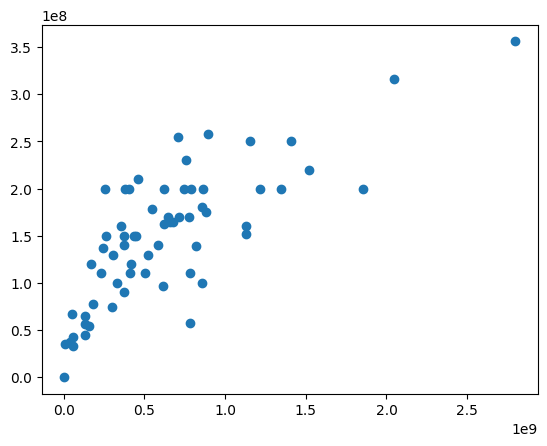

In [ ]:
#analisando a relação entre orçamento X total arrecadado
x = marvel['Worldwide']
y = marvel['Budget']
plt.scatter(x, y)
plt.show()

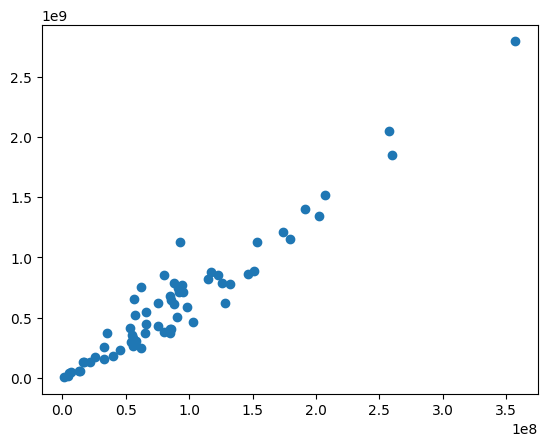

In [ ]:
x = marvel['OpeningWeekendNorthAmerica']
y = marvel['Worldwide']
plt.scatter(x, y)
plt.show()